In [13]:
!pip install newsapi-python

In [14]:
import pandas as pd
import numpy as np
from datetime import *

In [15]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='83873d1a7f0842e7a34eba6c06dfd98e')

In [16]:
sources = newsapi.get_sources()

In [17]:
sources_list = []
for source in sources['sources']:
    sources_list.append(source['id'])

print(len(sources_list))
sources_list

128


['abc-news',
 'abc-news-au',
 'aftenposten',
 'al-jazeera-english',
 'ansa',
 'argaam',
 'ars-technica',
 'ary-news',
 'associated-press',
 'australian-financial-review',
 'axios',
 'bbc-news',
 'bbc-sport',
 'bild',
 'blasting-news-br',
 'bleacher-report',
 'bloomberg',
 'breitbart-news',
 'business-insider',
 'business-insider-uk',
 'buzzfeed',
 'cbc-news',
 'cbs-news',
 'cnn',
 'cnn-es',
 'crypto-coins-news',
 'der-tagesspiegel',
 'die-zeit',
 'el-mundo',
 'engadget',
 'entertainment-weekly',
 'espn',
 'espn-cric-info',
 'financial-post',
 'focus',
 'football-italia',
 'fortune',
 'four-four-two',
 'fox-news',
 'fox-sports',
 'globo',
 'google-news',
 'google-news-ar',
 'google-news-au',
 'google-news-br',
 'google-news-ca',
 'google-news-fr',
 'google-news-in',
 'google-news-is',
 'google-news-it',
 'google-news-ru',
 'google-news-sa',
 'google-news-uk',
 'goteborgs-posten',
 'gruenderszene',
 'hacker-news',
 'handelsblatt',
 'ign',
 'il-sole-24-ore',
 'independent',
 'infobae',
 '

We have made request to all the sources ahead of this but got rejected due to the free plans, therefore we narrowed down the sources to 50 instead of covering all 128 sources

In [18]:
n_days = 30
query = 'tropical storm'
page = 1
page_size = 100

def get_response_json(query, n_days, source, page_size, page):
    response_json = newsapi.get_everything(q=query,
                                            language='en',
                                            from_param=str(date.today() - timedelta(days=n_days)),
                                            to= str(date.today()),
                                            sources = source,
                                            page_size=page_size,
                                            page = page,
                                            sort_by='relevancy')
    return response_json



results = []





for i in range(50):
    results.append(get_response_json(query, n_days, sources_list[i], page_size, page))

In [19]:
len(results)

50

In [20]:
results[0]

{'status': 'ok',
 'totalResults': 16,
 'articles': [{'source': {'id': 'abc-news', 'name': 'ABC News'},
   'author': 'Max Golembo',
   'title': 'Hurricane watch for Florida as Eta strengthens, ice and snow in the Midwest',
   'description': 'The threat from Eta is back for the U.S. and the cyclone is strengthening this morning in the eastern Gulf of Mexico as it moves north.',
   'url': 'https://abcnews.go.com/US/hurricane-watch-florida-eta-strengthens-ice-snow-midwest/story?id=74144720',
   'urlToImage': 'https://s.abcnews.com/images/US/eta-flor_hpMain_20201111-071526_16x9_992.jpg',
   'publishedAt': '2020-11-11T12:25:24Z',
   'content': 'The threat from Eta is back for the U.S. and the cyclone is strengthening this morning in the eastern Gulf of Mexico as it moves north.\r\nEta is currently a strong tropical storm with winds of 70 mph,… [+2018 chars]'},
  {'source': {'id': 'abc-news', 'name': 'ABC News'},
   'author': 'Daniel Manzo',
   'title': 'Tropical Storm Iota forecast to hit Ce

In [21]:
pip install wordcloud

In [22]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [23]:
# Create an empty string

# Loop through all the headlines and add them to 'text_combined' 
for i in range(len(results)):
    text_combined = ''
    for j in results[i]['articles']:
        text_combined += j['title'] + ''
        print(text_combined)

Hurricane watch for Florida as Eta strengthens, ice and snow in the Midwest
Hurricane watch for Florida as Eta strengthens, ice and snow in the MidwestTropical Storm Iota forecast to hit Central America as major hurricane
Hurricane watch for Florida as Eta strengthens, ice and snow in the MidwestTropical Storm Iota forecast to hit Central America as major hurricane1 dead, more than 40,000 displaced as Hurricane Iota tears through Central America
Hurricane watch for Florida as Eta strengthens, ice and snow in the MidwestTropical Storm Iota forecast to hit Central America as major hurricane1 dead, more than 40,000 displaced as Hurricane Iota tears through Central AmericaIota continues to bring deadly floods to Central America
Hurricane watch for Florida as Eta strengthens, ice and snow in the MidwestTropical Storm Iota forecast to hit Central America as major hurricane1 dead, more than 40,000 displaced as Hurricane Iota tears through Central AmericaIota continues to bring deadly floods t

In [24]:
len(text_combined)

2061

In [25]:
# To increase the accuracy, we excluded some certain keywords using the stopwords
STOPWORDS.add('hurricane')
STOPWORDS.add('tropical')
STOPWORDS.add('storm')
STOPWORDS.add('update')

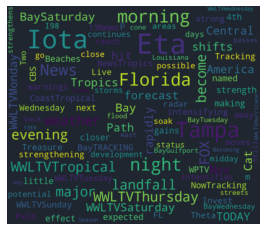

In [32]:
# To align the design of our story telling website, we customized the appearance of the image
wordcloud = WordCloud(background_color="#1F2630", width=1000, height=860, margin=2, max_font_size=110).generate(text_combined)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file('Tropical Storm.png')